<a href="https://colab.research.google.com/github/shyookml/fdl/blob/Chap.5/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

print(x_train.shape)

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

sample_size=9

random_idx=np.random.randint(60000,size=sample_size)

x_train=np.reshape(x_train/255,(-1,28,28,1))
x_test=np.reshape(x_test/255,(-1,28,28,1))

print(x_train.shape)

from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=777)
print('Fashion MNIST is ready!!')


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

model=Sequential([
    Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_val,y_val))

10000


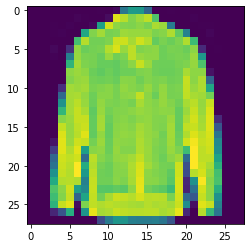

Shirt : Shirt


In [29]:
#model.evaluate(x_test,y_test)
results=model.predict(x_test)
print(len(results))
indx=np.random.randint(len(results))
arg_res=np.argmax(results,axis=-1)
plt.imshow(x_test[indx].reshape(28,28))
plt.show()
print(class_names[arg_res[indx]],":",class_names[np.argmax(y_test[indx])])

In [ ]:
model.summary()

In [ ]:
import os
from tensorflow.keras.utils import plot_model
plot_model(model,'./model.png',show_shapes=True)